<a href="https://colab.research.google.com/github/PDP1004/Face_Emotion/blob/main/Face_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mục mới

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import glob
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/EMOTIONS/train/train',target_size=(150,150), batch_size=1, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/EMOTIONS/train/validation',target_size=(150,150), batch_size=1, class_mode='categorical')

Found 40 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [77]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Buon': 0, 'GianDu': 1, 'HanhPhuc': 2, 'NgacNhien': 3}

In [78]:
#Tạo Model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 18, 18, 64)      

In [79]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 20, validation_data = validation_set, batch_size = 1, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


40/40 [==============================] - 2s 21ms/step - loss: 67.9484 - accuracy: 0.3250 - val_loss: 30.7355 - val_accuracy: 0.2500
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 8.7050 - accuracy: 0.4000 - val_loss: 5.7622 - val_accuracy: 0.2750
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 6.2442 - accuracy: 0.6000 - val_loss: 10.4832 - val_accuracy: 0.2500
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 7.5810 - accuracy: 0.5750 - val_loss: 8.6843 - val_accuracy: 0.1500
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 1.3533 - accuracy: 0.8250 - val_loss: 4.8075 - val_accuracy: 0.2750
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 1.4755 - accuracy: 0.8500 - val_loss: 11.3526 - val_accuracy: 0.2250
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 2.6303 - accuracy: 0.8000 - val_loss: 11.1449 - val_accuracy: 0.2750
Epoch 8/20
40/40 [=

In [80]:
model.save('model_save/CNN_Face_Emotions.h5')

Sai số kiểm tra là:  11.595732688903809
Độ chính xác kiểm tra là:  0.3499999940395355


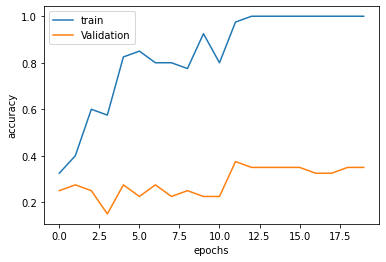

In [81]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [82]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model
CNN_Face_Emotions=load_model('model_save/CNN_Face_Emotions.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


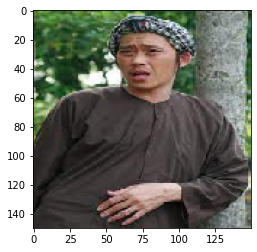

In [93]:
# img_path = '/content/drive/MyDrive/Colab Notebooks/EMOTIONS/test/NgacNhien/nhung-cau-noi-bay-to-su-ngac-nhien.jpg'
# img_path = '/content/drive/MyDrive/Colab Notebooks/EMOTIONS/test/GianDu/tải xuống.jfif'
img_path = '/content/drive/MyDrive/Colab Notebooks/EMOTIONS/test/hoailinh1.jfif'

img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
pre=np.argmax(CNN_Face_Emotions.predict(img),axis=1)
pred = model.predict(img)

classes = ['Buon','Gian dư' , 'Hanh Phuc', 'Ngac Nhien']

In [94]:
print(np.argmax(pred))
if pre == 0:
  print(classes[0])

elif pre == 1: 
  print(classes[1])

elif pre == 2: 
  print(classes[2])

elif pre == 3: 
  print(classes[3])

0
Buon
